# Lasso_Linear model

In [1]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from yellowbrick.model_selection import LearningCurve
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve

In [2]:
Data=pd.read_csv('Data/Result_dataset_130.csv')

In [3]:
features = Data.columns[0:13]
Head=Data.columns[14]
X = Data[features]
y = Data[Head]
cv = KFold(n_splits=10)

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Learning rate - alpha

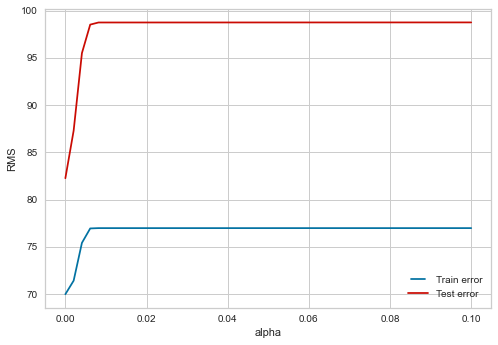

In [144]:
n_estimators = np.linspace(1e-06, 0.1, 50, endpoint=True)
train_results = []
test_results = []
for eta in n_estimators:
    model = Lasso(alpha=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('alpha')
plt.show()


## max_iterations

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

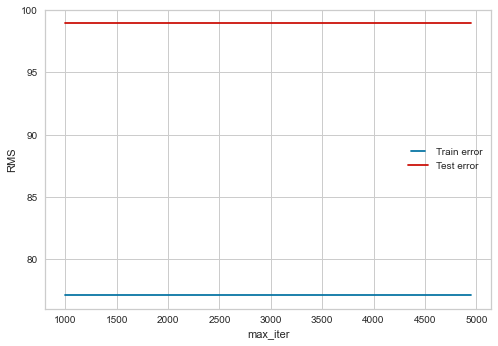

In [145]:
n_estimators = np.arange(1000,5000,50)
train_results = []
test_results = []
for eta in n_estimators:
    model = Lasso(max_iter=eta)
    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = model.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train error")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel('max_iter')
plt.show()

## Random Hyperparameter Grid
### Randomized search 

In [8]:
X=Data[features]
y=Data[Head]

In [147]:
# HIC15
alpha = np.linspace(1e-06, 0.1, 50, endpoint=True)
max_iter= np.arange(200,5000,100)
selection=['cyclic','random']

random_grid = {"alpha" :alpha,
               "max_iter":max_iter,
               "selection":selection}

In [148]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = Lasso()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 724 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:    4.4s finished


RandomizedSearchCV(cv=10, estimator=Lasso(), n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': array([1.00000000e-06, 2.04179592e-03, 4.08259184e-03, 6.12338776e-03,
       8.16418367e-03, 1.02049796e-02, 1.22457755e-02, 1.42865714e-02,
       1.63273673e-02, 1.83681633e-02, 2.04089592e-02, 2.24497551e-02,
       2.44905510e-02, 2.65313469e-02, 2.85721429e-02, 3.06129388e-02,
       3.26537347...
       8.97960204e-02, 9.18368163e-02, 9.38776122e-02, 9.59184082e-02,
       9.79592041e-02, 1.00000000e-01]),
                                        'max_iter': array([ 200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100, 1200,
       1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300,
       2400, 2500, 2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400,
       3500, 3600, 3700, 3800, 3900, 4000, 4100, 4200, 4300, 4400, 4500,
       4600, 4700, 4800, 4900]),
                                        'selection': ['cyclic', 'random']},
             

In [149]:
rf_random.best_params_

{'selection': 'random', 'max_iter': 4100, 'alpha': 1e-06}

In [4]:
mod=Lasso(alpha = 1e-06,selection='random')

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 84.98185272140219, tolerance: 10.823953546660062
  model = cd_fast.enet_coordinate_descent(


<Figure size 576x396 with 0 Axes>

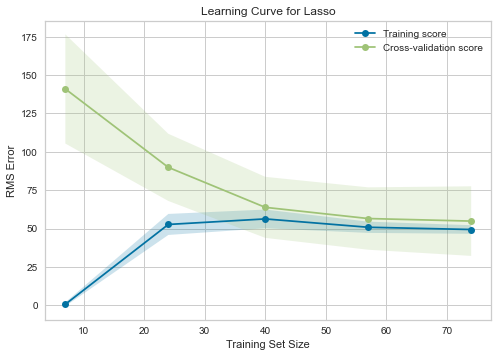

In [6]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [7]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 33.252604

Root Mean squared error: 73.132600

Root Mean squared error: 143.122391

Root Mean squared error: 80.454491

Root Mean squared error: 64.187049

Root Mean squared error: 56.303935

Root Mean squared error: 51.357643

Root Mean squared error: 62.328882

Root Mean squared error: 58.469085

Root Mean squared error: 66.568232

error COV--->0    0.919866
dtype: float64  error mean --->0    63.741931
Name: mean, dtype: float64  error std --->0    58.634036
Name: std, dtype: float64


# Grid search

In [33]:

#HIC15
alpha = np.linspace(1e-07, 0.1, 200)
# max_iter= np.arange(2000,2800,100)
selection=['cyclic','random']

random_grid = {"alpha" :alpha,
#                "max_iter":max_iter,
               "selection":selection}
               

In [34]:
Data=pd.read_csv('Result_dataset_130.csv')
Head = Data.columns[14]
Chest_deflection =  Data.columns[13]
Head_acceleration = Data.columns[15]
neck_force = Data.columns[16]
features = Data.columns[0:13]
X=Data[features]
y=Data[Chest_deflection]

In [35]:
rf = Lasso()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y)

Fitting 10 folds for each of 400 candidates, totalling 4000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 1032 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 3815 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 4000 out of 4000 | elapsed:    5.2s finished


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': array([1.00000000e-07, 5.02612060e-04, 1.00512412e-03, 1.50763618e-03,
       2.01014824e-03, 2.51266030e-03, 3.01517236e-03, 3.51768442e-03,
       4.02019648e-03, 4.52270854e-03, 5.02522060e-03, 5.52773266e-03,
       6.03024472e-03, 6.53275678e-03, 7.03526884e-03, 7.5377...
       9.04522709e-02, 9.09547829e-02, 9.14572950e-02, 9.19598070e-02,
       9.24623191e-02, 9.29648312e-02, 9.34673432e-02, 9.39698553e-02,
       9.44723673e-02, 9.49748794e-02, 9.54773915e-02, 9.59799035e-02,
       9.64824156e-02, 9.69849276e-02, 9.74874397e-02, 9.79899518e-02,
       9.84924638e-02, 9.89949759e-02, 9.94974879e-02, 1.00000000e-01]),
                         'selection': ['cyclic', 'random']},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [36]:
reg.best_estimator_

Lasso(alpha=1e-07, selection='random')

In [8]:
X=Data[features]
y=Data[Head]

In [9]:
# mod=Lasso(alpha = 8e-07,selection='random',max_iter = 2700)
mod=Lasso(alpha=1e-07, selection='random',max_iter=100000)

In [10]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
kf=cv

C:\Users\ypyas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

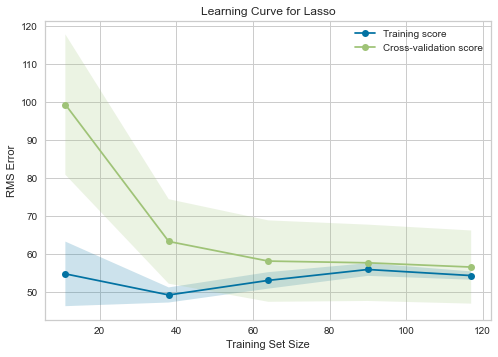

In [11]:
# cv = KFold(n_splits=10, random_state=1)
# y_actual = []
# predict = []
# X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_mean_absolute_error')
kf=cv
train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [10]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.098134

Root Mean squared error: 0.065824

Root Mean squared error: 0.121013

Root Mean squared error: 0.129458

Root Mean squared error: 0.097906

Root Mean squared error: 0.119617

Root Mean squared error: 0.080990

Root Mean squared error: 0.094881

Root Mean squared error: 0.120814

Root Mean squared error: 0.122124

error COV--->0    0.580287
dtype: float64  error mean --->0    0.072774
Name: mean, dtype: float64  error std --->0    0.04223
Name: std, dtype: float64


# train score

In [58]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    0.812201
dtype: float64  error mean --->0    0.08006
Name: mean, dtype: float64  error std --->0    0.065025
Name: std, dtype: float64


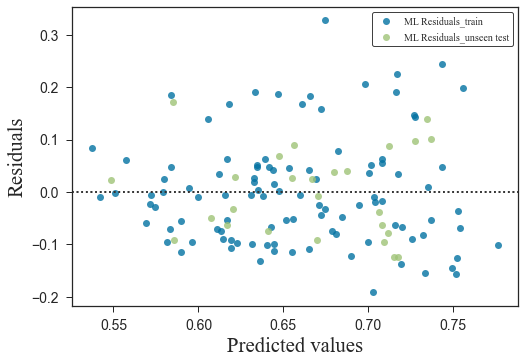

In [59]:
plt.figure()

plt.style.use('seaborn-ticks')
csfont = {'fontname':'Times New Roman'}
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
# plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='xx-large',**csfont)
plt.ylabel('Residuals', fontsize='xx-large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"

leg = plt.legend(frameon=True,loc='best')
leg.get_frame().set_linewidth(1)
leg.get_frame().set_edgecolor('k')
plt.grid(False)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.xlim([30,60])
# plt.ylim([-10,10])
# plt.savefig('chest_130_res', bbox_inches="tight")
plt.show()